In [153]:
import sympy as sp
import numpy as np
import scipy as sc
import time
import pickle
import sympy.physics.mechanics as me
import sys
sys.path.insert(0, "..")
from importlib import reload

In [2]:
import equations as eq
reload (eq);
model_struct = sc.io.loadmat('../das3_simplified_quat.mat')
data_struct = sc.io.loadmat('../data_model_python2.mat')
initPosQuat = 'InitPosOptQuat'
start = time.time()
MM,FO,TE,q,w,u0,fr,frstar,kinematical,xdot,holonomic,activations = eq.create_eoms_u0state(model_struct,data_struct,initPosQuat,derive = 'numeric')
time_to_create = time.time() - start
print(time_to_create)

1212.813421010971


In [64]:
import equations as eq
reload (eq);
data_struct = sc.io.loadmat('../data_model.mat')
model_struct = sc.io.loadmat('../das3_full_quat.mat')
initPosQuat = 'InitPosOptQuat'
TE,act = eq.create_eoms(model_struct,data_struct,initPosQuat,derive = 'numeric')
# me.mprint(res)

TE created


In [54]:
t = sp.Symbol('t')
my_list = [i for i in free_symbols if i!=t]
my_list

[actSym_45,
 actSym_55,
 actSym_88,
 actSym_80,
 actSym_49,
 actSym_76,
 actSym_109,
 actSym_61,
 actSym_94,
 actSym_12,
 actSym_86,
 actSym_96,
 actSym_92,
 actSym_63,
 actSym_69,
 actSym_10,
 actSym_79,
 actSym_110,
 actSym_24,
 actSym_9,
 actSym_6,
 actSym_44,
 actSym_31,
 actSym_39,
 actSym_14,
 actSym_130,
 actSym_33,
 actSym_106,
 actSym_73,
 actSym_20,
 actSym_50,
 actSym_16,
 actSym_77,
 actSym_81,
 actSym_102,
 actSym_72,
 actSym_64,
 actSym_104,
 actSym_41,
 actSym_132,
 actSym_136,
 actSym_65,
 actSym_43,
 actSym_99,
 actSym_98,
 actSym_54,
 actSym_128,
 actSym_68,
 actSym_100,
 actSym_1,
 actSym_108,
 actSym_59,
 actSym_27,
 actSym_2,
 actSym_40,
 actSym_21,
 actSym_35,
 actSym_66,
 actSym_18,
 actSym_129,
 actSym_53,
 actSym_52,
 actSym_75,
 actSym_4,
 actSym_107,
 actSym_13,
 actSym_60,
 actSym_7,
 actSym_70,
 actSym_91,
 actSym_114,
 actSym_83,
 actSym_118,
 actSym_48,
 actSym_8,
 actSym_62,
 actSym_17,
 actSym_133,
 actSym_58,
 actSym_28,
 actSym_32,
 actSym_67,
 actSym

In [4]:
import equations as eq
reload (eq);


initPosQuat = 'InitPosOptQuat'
dict_vals,symlist, value_list = eq.create_parameters_dict(data_struct, initPosQuat)
x0 = data_struct['params']['InitPosOptQuat'][0,0]['initCondQuat'].item()
x0t = list(x0.T[0])

In [14]:
xdot

Matrix([
[Derivative(q1_clavicula(t), t)],
[Derivative(q2_clavicula(t), t)],
[Derivative(q3_clavicula(t), t)],
[  Derivative(q1_scapula(t), t)],
[  Derivative(q2_scapula(t), t)],
[  Derivative(q3_scapula(t), t)],
[  Derivative(q1_humerus(t), t)],
[  Derivative(q2_humerus(t), t)],
[  Derivative(q3_humerus(t), t)],
[      Derivative(q_ulna(t), t)],
[Derivative(q0_clavicula(t), t)],
[  Derivative(q0_scapula(t), t)],
[  Derivative(q0_humerus(t), t)],
[Derivative(w1_clavicula(t), t)],
[Derivative(w2_clavicula(t), t)],
[Derivative(w3_clavicula(t), t)],
[  Derivative(w1_scapula(t), t)],
[  Derivative(w2_scapula(t), t)],
[  Derivative(w3_scapula(t), t)],
[  Derivative(w1_humerus(t), t)],
[  Derivative(w2_humerus(t), t)],
[  Derivative(w3_humerus(t), t)],
[      Derivative(w_ulna(t), t)],
[Derivative(u0_clavicula(t), t)],
[  Derivative(u0_scapula(t), t)],
[  Derivative(u0_humerus(t), t)]])

In [3]:
dqs = sp.symbols('dq0:13')
dws = sp.symbols('dw1:11')
du0s = sp.symbols('du1:3')

start = time.time()
# eoms_implicit = sp.Matrix(sp.Matrix(kindeq).col_join(fr+frstar))
dxs = list(dqs)+list(dws)+list(du0s)
sub_dq = dict(zip(xdot,dxs))
# eoms_subbed = me.msubs(eoms_implicit,sub_dq)
fr_subbed = me.msubs(fr,sub_dq)
frstar_subbed = me.msubs(frstar,sub_dq)
time_to_create = time.time() - start
print(time_to_create)

488.5390646457672


In [4]:
start = time.time()
# eoms_implicit_lam = sp.lambdify(q + w + dxs + activations, eoms_subbed,cse=True)
fr_lam = sp.lambdify(q + w + u0 + dxs + activations, fr_subbed,cse=True)
frstar_lam = sp.lambdify(q + w + u0 + dxs + activations, frstar_subbed,cse=True)
# TE_lam = sp.lambdify(q + w + dxs + activations, TE,cse=True)
time_to_create = time.time() - start
print(time_to_create)

483.19964838027954


In [16]:
qq = np.linspace(0.1,1,13)
uu = np.zeros(10)
uu0 = np.zeros(2)
dxxs = np.zeros(len(xdot))
acts = np.zeros(36)
fr_lam(*qq,*uu,*uu0,*dxxs,*acts)

array([[18.72390313],
       [ 3.953035  ],
       [36.64801276],
       [-6.94084646],
       [ 3.39758984],
       [15.97310832],
       [-2.04809048],
       [ 0.92302421],
       [-3.90984752],
       [-0.94610275]])

In [6]:
def result(t, y):

    res = eoms_implicit_lam(*y)+TE_lam(*y)
    return res

xdot_lam = list(np.zeros_like(x0t))
acts = list(np.zeros(36))
inputs = x0t+xdot_lam+acts
result(0,inputs)

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.48790699e-08],
       [-3.25819531e-08],
       [ 6.79130920e-08],
       [-1.20538374e-07],
       [-9.09862941e-09],
       [ 2.07978401e-09],
       [-4.37587782e-08],
       [-1.64224477e-08],
       [-1.59809965e-09],
       [-1.95863326e-11]])

In [7]:
duration = 1.0  # seconds
num_nodes = 10
interval_value = duration/(num_nodes - 1)
time = np.linspace(0.0, duration, num=num_nodes)

state_symbols = tuple(q+w)
specified_symbols = activations
t = me.dynamicsymbols._t


In [5]:
import equations as eq
reload (eq);

start = time.time()
eq.save_eoms_implicit(eoms_implicit,q,w,'eoms_implicit.txt')
time_to_create = time.time() - start
print(time_to_create)

85.60313415527344


In [15]:
import equations as eq
reload (eq);

start = time.time()
eoms_back = eq.load_eoms_implicit(q,w,'eoms_implicit.txt')
time_to_create = time.time() - start
print(time_to_create)

type(eoms_back)

121.24883508682251


sympy.matrices.dense.MutableDenseMatrix

In [2]:
import equations as eq
reload (eq);


start = time.time()
MM,FO,q,w,eoms_implicit = eq.load_eoms('eoms2.txt')
time_to_create = time.time() - start
print(time_to_create)

6.4315025806427


235.2402858734131


In [8]:
def result(t, y, args):

    res = eoms_implicit_lam(*y, *args)
    return res

In [9]:
xf = np.linspace(0.1,1,13)
uf = np.linspace(0.1,1,10)
dxf = np.linspace(0.1,1,13)
duf = np.linspace(0.1,1,10)

inputs = list(xf)+list(uf)+list(dxf)+list(duf)
result(0,inputs,value_list)

array([[ 1.82500000e-01],
       [ 1.65000000e-01],
       [ 2.50000000e-01],
       [ 3.05000000e-01],
       [ 8.20000000e-01],
       [ 3.86250000e-01],
       [ 4.67500000e-01],
       [ 4.96250000e-01],
       [ 1.72750000e+00],
       [ 5.17500000e-01],
       [ 5.95000000e-01],
       [ 5.97500000e-01],
       [ 0.00000000e+00],
       [-4.38221620e+03],
       [-4.75243182e+03],
       [ 4.12941024e+03],
       [-1.31930551e+03],
       [ 1.73515842e+03],
       [-4.30559800e+03],
       [-5.84507907e+07],
       [-9.56429700e+07],
       [ 4.94185608e+07],
       [-5.21705106e+04]])

In [30]:
eoms_implicit_lam(*xf,*uf,*dxf,*duf,*value_list)

array([[-8.25000000e-02],
       [ 1.00000000e-02],
       [-3.46944695e-18],
       [ 2.00000000e-02],
       [-4.20000000e-01],
       [ 8.87500000e-02],
       [ 8.25000000e-02],
       [ 1.28750000e-01],
       [-1.02750000e+00],
       [ 2.57500000e-01],
       [ 2.55000000e-01],
       [ 3.27500000e-01],
       [ 1.00000000e+00],
       [-3.57538794e+00],
       [-1.34500939e+00],
       [-1.09490014e+01],
       [ 2.00726176e+00],
       [-8.62902690e+00],
       [-2.87226132e+00],
       [-3.56486270e+00],
       [-1.11660468e+00],
       [-9.00458553e-01],
       [-2.76177998e+00]])

In [5]:
from numpy import radians, linspace, hstack, zeros, ones
from scipy.integrate import odeint, solve_ivp
from pydy.codegen.ode_function_generators import generate_ode_function

In [6]:
force_lam = sp.lambdify(q + w + symlist, FO, cse=True)

In [32]:
te_lam = sp.lambdify(q + w + symlist, TE, cse=True)

In [7]:
mm_lam = sp.lambdify(q + w + symlist, MM, cse=True)

In [9]:
qlam = np.ones(13)
wlam = np.ones(10)
force_lam(*qlam,*wlam,*value_list)

array([[-1.50000000e+00],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [-1.50000000e+00],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [-1.50000000e+00],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [ 5.00000000e-01],
       [ 1.00000000e+00],
       [ 1.03796709e+07],
       [-3.34846205e+05],
       [ 5.70433388e+06],
       [ 7.26447418e+04],
       [ 9.39394230e+05],
       [ 2.59491734e+06],
       [-2.32666693e+02],
       [-8.01487832e+01],
       [ 1.10967240e+02],
       [-2.20715701e+02]])

In [61]:
def gradient(t, y, args):
    y[0:4] = y[0:4]/np.linalg.norm(y[0:4])
    y[4:8] = y[4:8]/np.linalg.norm(y[4:8])
    y[8:12] = y[8:12]/np.linalg.norm(y[8:12])
    
    right_hand = force_lam(*y, *args) + te_lam(*y, *args)
    sol = np.linalg.solve(mm_lam(*y, *args), right_hand)
    return np.array(sol).T[0]

In [62]:
interval = 2.
schritte = 100 * int(interval)
times = np.linspace(0., interval, schritte)
t_span = (0., interval)
x0 = data_struct['params']['InitPosOptQuat'][0,0]['initCondQuat'].item()
x0t = list(x0.T[0])

In [79]:
state_traj = solve_ivp(gradient, t_span, x0t, t_eval = times, args=(value_list,), method='Radau')


# import matplotlib.pyplot as plt
# for i in range(10):
#     plt.plot(t, state_trajectories[:, i])

# plt.xlabel('t')
# plt.grid()
# plt.show()

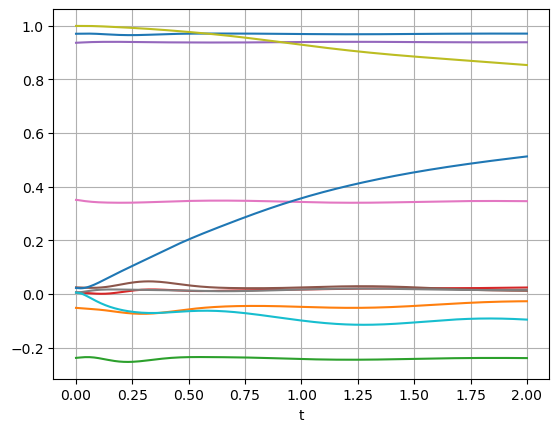

In [81]:
import matplotlib.pyplot as plt
for i in range(11):
    plt.plot(state_traj.t, state_traj.y[i, :])

plt.xlabel('t')
plt.grid()
plt.show()

In [105]:
with open('reseq.txt','wb') as f:
    pickle.dump(res,f)

In [7]:
with open('reseq.txt','rb') as f:
    newres = pickle.load(f)

In [219]:
with open('rovnice.txt', 'r') as f:
    serialized_rovnice = f.read()

# Deserializace rovnice pomocí sympify
rovnice = sp.sympify(serialized_rovnice)

In [152]:
model_struct = sc.io.loadmat('../das3_full_eul_03.mat')
mus = model_struct['model_full_eul']['muscles'].item()[0,0]

mus['origin_position'].item()[0][0]

-0.0081

In [148]:
jnts = model_struct['model_full_eul']['joints'].item()
offset_thorax = jnts[0,1]['location'].item().item()
offset_thorax

ValueError: can only convert an array of size 1 to a Python scalar